In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 訓練データをロード

train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# 訓練データの目的変数を分離

y_train_df = train_df.iloc[:, [-1]]
y_train_df

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [5]:
# 訓練データを説明変数だけにする

X_train_df = train_df.drop(columns="SalePrice")
X_train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [6]:
# 訓練データとテストデータを concat

train = pd.concat([X_train_df, test_df])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# 特徴量を絞る

train_extracted = train[["GrLivArea", "YearBuilt"]]
train_extracted

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1454,1092,1970
1455,1092,1970
1456,1224,1960
1457,970,1992


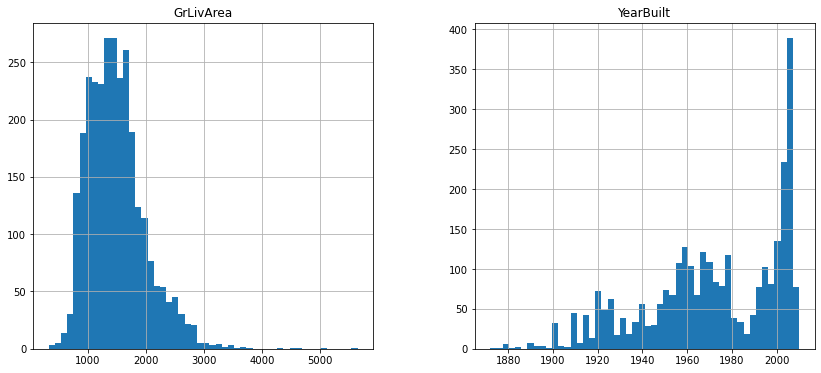

In [8]:
# 分布の確認

train_extracted.hist(bins=50, figsize=(14, 6))
plt.show()

In [9]:
# 対数変換をする

train_logged = np.log(train_extracted)
train_logged

,GrLivArea,YearBuilt
0,7.444249,7.602401
1,7.140453,7.588830
2,7.487734,7.601402
3,7.448334,7.557473
4,7.695303,7.600902
...,...,...
1454,6.995766,7.585789
1455,6.995766,7.585789
1456,7.109879,7.580700
1457,6.877296,7.596894


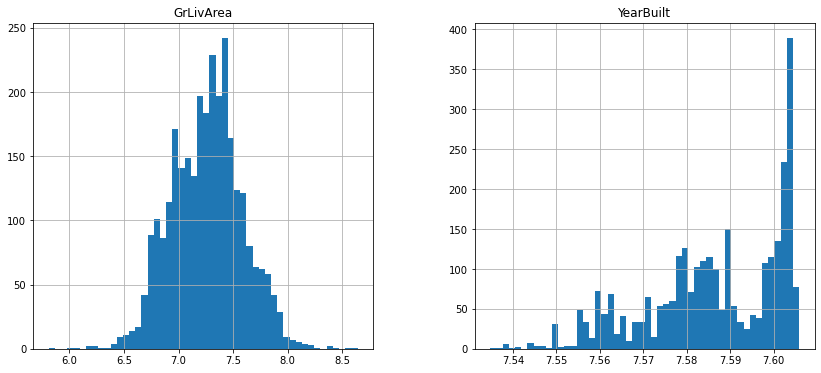

In [10]:
# 再度分布の確認

train_logged.hist(bins=50, figsize=(14, 6))
plt.show()

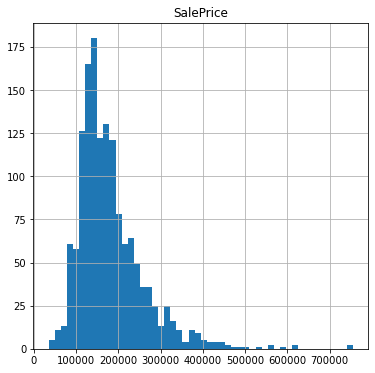

In [11]:
# yの分布の確認

y_train_df.hist(bins=50, figsize=(6, 6))
plt.show()

In [12]:
y_train_df = np.log(y_train_df)
y_train_df

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


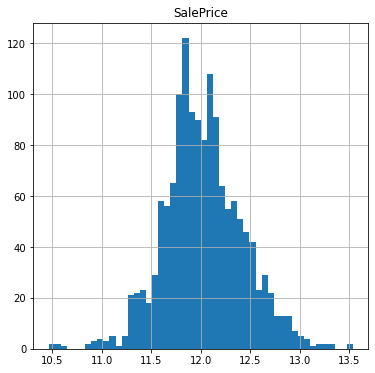

In [13]:
y_train_df.hist(bins=50, figsize=(6, 6))
plt.show()

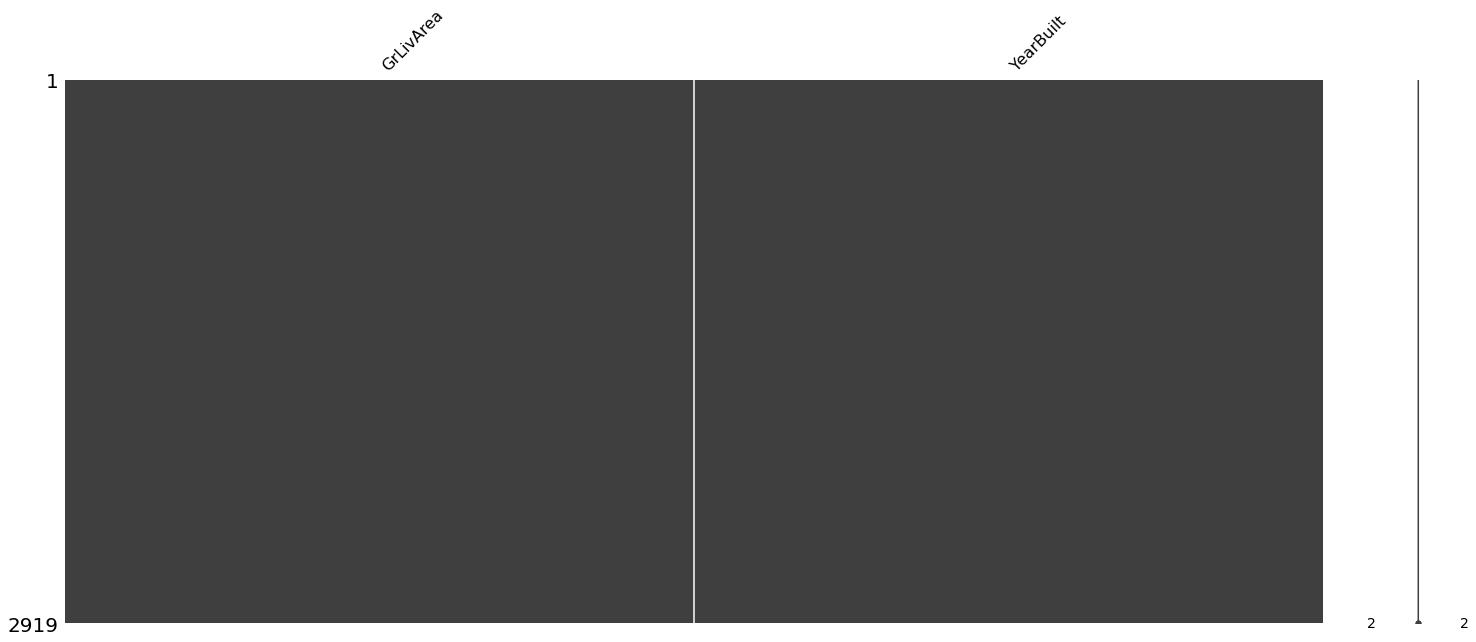

In [14]:
# 欠損値の確認

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(train_logged)
plt.show()

In [15]:
# 訓練データとテストデータを再分割

X_train_df = train_logged.iloc[ : len(X_train_df), : ]
X_train_df

,GrLivArea,YearBuilt
0,7.444249,7.602401
1,7.140453,7.588830
2,7.487734,7.601402
3,7.448334,7.557473
4,7.695303,7.600902
...,...,...
1455,7.406711,7.600402
1456,7.636752,7.589842
1457,7.757906,7.570959
1458,6.982863,7.575585


In [16]:
test_df = train_logged.iloc[len(test_df)+1 : , :]
test_df

,GrLivArea,YearBuilt
0,6.797940,7.581210
1,7.192182,7.579679
2,7.395722,7.599401
3,7.380256,7.599902
4,7.154615,7.596894
...,...,...
1454,6.995766,7.585789
1455,6.995766,7.585789
1456,7.109879,7.580700
1457,6.877296,7.596894


In [17]:
# 訓練データを train_test_split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_df, y_train_df)

In [18]:
# 評価用

from sklearn.metrics import mean_squared_error
print(y_val[:5])
print(y_val.shape)

      SalePrice
365   11.898188
1387  11.820410
691   13.534473
609   11.682668
1225  11.884489
(365, 1)


In [19]:
# モデル１：線形回帰

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression().fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_val)

print(y_pred_linear[:5])
print(y_pred_linear.shape)
print("MSE : "+ str(mean_squared_error(y_val, y_pred_linear)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, y_pred_linear))))

[[11.67856784]
 [12.12356282]
 [12.97851887]
 [11.72205201]
 [11.77933888]]
(365, 1)
MSE : 0.04462906075161996
RMSE : 0.21125591293883342


In [20]:
# モデル２：SVM（回帰）

from sklearn.svm import SVR

model_svr = SVR().fit(X_train, y_train.values.ravel())
y_pred_svr = model_svr.predict(X_val)

print(y_pred_svr[:5])
print(y_pred_svr.shape)
print("MSE : "+ str(mean_squared_error(y_val, y_pred_svr)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, y_pred_svr))))

[11.71767571 12.29096509 12.4140745  11.75199728 11.79251397]
(365,)
MSE : 0.04719888903905324
RMSE : 0.2172530530028364


In [21]:
# モデル３：決定木

from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_val)

print(y_pred_dtr[:5])
print(y_pred_dtr.shape)
print("MSE : "+ str(mean_squared_error(y_val, y_pred_dtr)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, y_pred_dtr))))

[11.58988651 12.27606502 13.5211395  12.0917835  11.81303006]
(365,)
MSE : 0.06960040203604982
RMSE : 0.2638188811212151


# 【問題1】ブレンディングのスクラッチ実装

In [22]:
# blending function

def blenging(pred1, pred2, w1=1., w2=1.):
    
    pred1 = pred1.ravel() 
    pred2 = pred2.ravel()
    #print(pred1[:5])
    
    pred1 = pred1 * w1
    pred2 = pred2 * w2
    #print(pred1[:5])
    
    pred_concat = np.vstack([pred1, pred2])
    print(pred_concat.shape)
    
    pred_blended = np.mean(pred_concat, axis=0)
    #print(pred_blended)
    
    return pred_blended

In [23]:
# 1. 線形回帰 & SVM

pred_blended1 = blenging(y_pred_linear, y_pred_svr, w1=1.2, w2=0.8)

print(pred_blended1[:5])
print("MSE : "+ str(mean_squared_error(y_val, pred_blended1)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, pred_blended1))))

(2, 365)
[11.69421099 12.19052373 12.75274112 11.73403012 11.78460892]
MSE : 0.04470618706267085
RMSE : 0.2114383765135148


In [24]:
# 2. 線形回帰 & 決定木

pred_blended2 = blenging(y_pred_linear, y_pred_dtr, w1=1.2, w2=0.8)

print(pred_blended2[:5])
print("MSE : "+ str(mean_squared_error(y_val, pred_blended2)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, pred_blended2))))

(2, 365)
[11.64309531 12.1845637  13.19556712 11.86994461 11.79281535]
MSE : 0.045067808973523096
RMSE : 0.21229180147505247


In [25]:
# 3. SVM & 決定木

pred_blended3 = blenging(y_pred_svr, y_pred_dtr, w1=0.8, w2=1.1)

print(pred_blended3[:5])
print("MSE : "+ str(mean_squared_error(y_val, pred_blended3)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, pred_blended3))))

(2, 365)
[11.06150786 11.66822179 12.40225652 11.35127983 11.21417212]
MSE : 0.39398513622200526
RMSE : 0.6276823529636668


# 【問題2】バギングのスクラッチ実装

In [26]:
# bagging function

def bagging(X, y, model, test_size=0.25, N=1000):
    
    y_preds = np.zeros((N, int(len(y)*test_size)))
    
    for i in range(N):
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, shuffle=True)
        
        """
        model はインスタンス化したモデルを引数にとる
        """
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_preds[i] = y_pred.reshape(1, -1)
    
    # 推定結果の平均をとる
    y_bagged = np.mean(y_preds, axis=0).ravel()
    #print(y_preds[:5])
    #print(y_preds.shape)
    #print(y_bagged.shape)
    
    return y_bagged

In [27]:
model = LinearRegression()
y_bagged = bagging(X_train_df, y_train_df, model)

print(y_bagged[:5])
print("MSE : "+ str(mean_squared_error(y_val, y_bagged)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_val, y_bagged))))

[12.02910081 12.03065168 12.02325654 12.01885253 12.02753716]
MSE : 0.15323769259241077
RMSE : 0.3914558628918601


# 【問題3】スタッキングのスクラッチ実装

### <学習時>

#### （ステージ $0$ ）
* 学習データを $K_0$ 個に分割する。
* 分割した内の $(K_0 - 1)$ 個をまとめて学習用データ、残り $1$ 個を推定用データとする組み合わせが $K_0$ 個作れる。
* あるモデルのインスタンスを $K_0$ 個用意し、異なる学習用データを使い学習する。
* それぞれの学習済みモデルに対して、使っていない残り $1$ 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
* さらに、異なるモデルのインスタンスも $K_0$ 個用意し、同様のことを行う。モデルが $M_0$ 個あれば、 $M_0$ 個のブレンドデータが得られる。
#### （ステージ $n$ ）
* ステージ $n-1$ のブレンドデータを$M_{n-1}$ 次元の特徴量を持つ学習用データと考え、 $K_n$ 個に分割する。以下同様である。
#### （ステージ $N$ ）＊最後のステージ
* ステージ $N-1$ の $M_{N-1}$ 個のブレンドデータを$M_{N-1}$ 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。
### ＜推定時＞
#### （ステージ $0$ ）
* テストデータを $K_0×M_0$ 個の学習済みモデルに入力し、$K_0×M_0$ 個の推定値を得る。これを $K_0$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）
#### （ステージ $n$ ）
* ステージ $n-1$ で得たブレンドテストを $K_n×M_n$ 個の学習済みモデルに入力し、$K_n×M_n$ 個の推定値を得る。これを $K_n$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）
#### （ステージ $N$ ）＊最後のステージ
* ステージ $N-1$ で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [28]:
from sklearn.model_selection import KFold

In [29]:
# stacking function

def predict_cv(model, train_x, train_y, test_x, n_splits=4):
    
    kf = KFold(n_splits=n_splits, shuffle=True)
    
    preds = np.zeros((int(len(train_x) / n_splits) , n_splits))
    preds_test = np.zeros((int(len(test_x)) , n_splits))
    va_idxes = []
    
    # k個分のデータを分割
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = X_train_df.iloc[tr_idx], X_train_df.iloc[va_idx]
        tr_y, va_y = y_train_df.iloc[tr_idx], y_train_df.iloc[va_idx]
        tr_y = tr_y.values.ravel()
        va_y = va_y.values.ravel()
        
        # 推定値（ブレンドデータ）を配列で保存
        model.fit(tr_x, tr_y)
        pred = model.predict(va_x)
        preds[:, i] = pred.ravel()
        
        # テストデータの推定値も保存
        pred_test = model.predict(test_x)
        preds_test[:, i] = pred_test.ravel()
        
        # index順も保存
        va_idxes.append(va_idx)
        
    # 予測値を再結合し、index順にソート    
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]
    
    # テストデータの予測値の平均をとる
    preds_test = np.mean(preds_test, axis=1)
    
    return pred_train, preds_test

In [30]:
# base_model1

base_model1 = LinearRegression()

pred_train1, pred_test1 = predict_cv(base_model1, X_train_df, y_train_df, test_df, n_splits=4)
print(pred_train1.shape)
print(pred_test1.shape)
print("MSE : "+ str(mean_squared_error(y_train_df, pred_train1)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_train_df, pred_train1))))

(1460,)
(1459,)
MSE : 0.2713919163733623
RMSE : 0.5209528926624386


In [31]:
# base_model2

base_model2 = DecisionTreeRegressor()

pred_train2, pred_test2 = predict_cv(base_model2, X_train_df, y_train_df, test_df, n_splits=4)
print(pred_train2.shape)
print(pred_test2.shape)
print("MSE : "+ str(mean_squared_error(y_train_df, pred_train2)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_train_df, pred_train2))))

(1460,)
(1459,)
MSE : 0.3278033661569628
RMSE : 0.5725411480033228


In [32]:
# base_modelの予測値を meta_model の入力とする

oof_train_df = pd.DataFrame({"pred_train1" : pred_train1, "pred_train2" : pred_train2})
oof_test_df = pd.DataFrame({"pred_test1" : pred_test1, "pred_test2" : pred_test2})
print(oof_train_df.shape)
print(oof_test_df.shape)

(1460, 2)
(1459, 2)


In [33]:
# meta_model

meta_model = SVR()

pred_train3, pred_test3 = predict_cv(meta_model, oof_train_df, y_train_df, oof_test_df, n_splits=4)
print(pred_train3.shape)
print(pred_test3.shape)
print("MSE : "+ str(mean_squared_error(y_train_df, pred_train3)))
print("RMSE : "+ str(np.sqrt(mean_squared_error(y_train_df, pred_train3))))

(1460,)
(1459,)
MSE : 0.2584003330021148
RMSE : 0.5083309286302721
